## TẢI CÁC THƯ VIỆN CẦN THIẾT

In [ ]:
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

In [7]:
pip install gensim

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from src.models import TopicModelManager

# Load Data
df = pd.read_csv('data/topic_modeling_data.csv')

import ast
df['tokens'] = df['tokens'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

print("Đang khởi tạo TopicManager...")
manager = TopicModelManager(df, text_col='clean_text', token_col='tokens')

Đang khởi tạo TopicManager...


## Xây dựng các hàm đánh giá các chỉ số

In [9]:
def evaluate_models(model_type, k_range):
    results = []
    print(f"--- Đang chạy đánh giá {model_type} ---")
    
    for k in k_range:
        if model_type == 'LSA':
            _, comp, sep, score = manager.run_lsa(n_topics=k)
        elif model_type == 'NMF':
            _, comp, sep, score = manager.run_nmf(n_topics=k)
        elif model_type == 'LDA':
            _, comp, sep, score = manager.run_lda(n_topics=k)
        
        results.append((k, comp, sep, score))
        print(f"k={k} | Comp={comp:.4f} | Sep={sep:.4f} | Score={score:.4f}")
        
    return results

def plot_metrics(results, title):
    ks = [r[0] for r in results]
    comps = [r[1] for r in results]
    seps = [r[2] for r in results]
    scores = [r[3] for r in results]
    
    plt.figure(figsize=(12, 6))
    
    plt.plot(ks, comps, marker='o', label='Compactness (Higher is Better)', color='green')
    plt.plot(ks, seps, marker='s', label='Separation (Lower is Better)', color='orange')
    plt.plot(ks, scores, marker='^', label='Score = Sep/Comp (Lower is Better)', color='red', linestyle='--')
    
    plt.xlabel("Số lượng Topics (k)")
    plt.ylabel("Giá trị Metrics")
    plt.title(f"Đánh giá mô hình {title}")
    plt.legend()
    plt.grid(True)
    plt.xticks(ks)
    plt.show()

# LSA

--- Đang chạy đánh giá LSA ---
k=5 | Comp=0.0885 | Sep=0.6845 | Score=7.7351
k=6 | Comp=0.1020 | Sep=0.7278 | Score=7.1364
k=7 | Comp=0.1214 | Sep=0.7367 | Score=6.0677
k=8 | Comp=0.1319 | Sep=0.7429 | Score=5.6312
k=9 | Comp=0.1434 | Sep=0.7502 | Score=5.2318
k=10 | Comp=0.1548 | Sep=0.7562 | Score=4.8853
k=11 | Comp=0.1817 | Sep=0.7496 | Score=4.1248
k=12 | Comp=0.1846 | Sep=0.7607 | Score=4.1210
k=13 | Comp=0.1962 | Sep=0.7592 | Score=3.8692
k=14 | Comp=0.2105 | Sep=0.7654 | Score=3.6355
k=15 | Comp=0.2201 | Sep=0.7619 | Score=3.4612
k=16 | Comp=0.2376 | Sep=0.7702 | Score=3.2411
k=17 | Comp=0.2529 | Sep=0.7570 | Score=2.9938
k=18 | Comp=0.2522 | Sep=0.7699 | Score=3.0533
k=19 | Comp=0.2668 | Sep=0.7612 | Score=2.8529
k=20 | Comp=0.2715 | Sep=0.7614 | Score=2.8042
k=21 | Comp=0.2863 | Sep=0.7646 | Score=2.6703
k=22 | Comp=0.2750 | Sep=0.7829 | Score=2.8469
k=23 | Comp=0.3004 | Sep=0.7675 | Score=2.5549
k=24 | Comp=0.2937 | Sep=0.7794 | Score=2.6539
k=25 | Comp=0.3151 | Sep=0.7678 | 

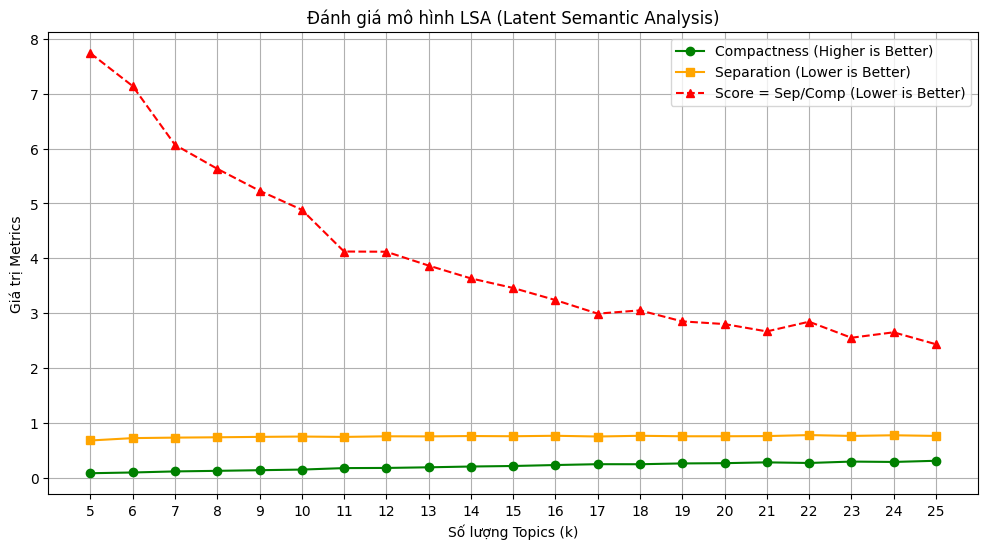

In [12]:
k_range = range(5, 26) 
lsa_res = evaluate_models('LSA', k_range)
plot_metrics(lsa_res, "LSA (Latent Semantic Analysis)")

In [13]:
#Ta thấy số topic tối ưu nhất là 5
BEST_K_LSA = 5 
print(f"--- KẾT QUẢ CUỐI CÙNG LSA (k={BEST_K_LSA}) ---")
topics_data, _, _, _ = manager.run_lsa(n_topics=BEST_K_LSA)

df_lsa = pd.DataFrame(topics_data)
# Hiển thị toàn văn Caption để thấy độ hiệu quả
pd.set_option('display.max_colwidth', None)
display(df_lsa[['Topic_ID', 'Caption']])

--- KẾT QUẢ CUỐI CÙNG LSA (k=5) ---


,Topic_ID,Caption
0,0,lương | nhân_viên | công_ty | công_việc | làm_việc | xong | bắt
1,1,lương | nhân_viên | tr | thưởng | đóng | ứng | chậm
2,2,lương | phỏng_vấn | tr | kinh_nghiệm | đóng | hr
3,3,đóng | công_ty | bảo_hiểm | bệnh | bhxh | nợ | trung_tâm
4,4,phỏng_vấn | nhân_viên | công_ty | câu | nghỉ | gửi | hr


# NMF

--- Đang chạy đánh giá NMF ---
k=5 | Comp=0.0715 | Sep=0.7292 | Score=10.1955
k=6 | Comp=0.0819 | Sep=0.7276 | Score=8.8813
k=7 | Comp=0.0954 | Sep=0.7240 | Score=7.5853
k=8 | Comp=0.1052 | Sep=0.7258 | Score=6.8959
k=9 | Comp=0.1140 | Sep=0.7308 | Score=6.4080
k=10 | Comp=0.1222 | Sep=0.7347 | Score=6.0129
k=11 | Comp=0.1274 | Sep=0.7476 | Score=5.8704
k=12 | Comp=0.1315 | Sep=0.7570 | Score=5.7570
k=13 | Comp=0.1365 | Sep=0.7627 | Score=5.5869
k=14 | Comp=0.1414 | Sep=0.7700 | Score=5.4440
k=15 | Comp=0.1441 | Sep=0.7800 | Score=5.4122
k=16 | Comp=0.1501 | Sep=0.7810 | Score=5.2045
k=17 | Comp=0.1519 | Sep=0.7870 | Score=5.1811
k=18 | Comp=0.1564 | Sep=0.7936 | Score=5.0726
k=19 | Comp=0.1591 | Sep=0.7940 | Score=4.9911
k=20 | Comp=0.1614 | Sep=0.8017 | Score=4.9671


C:\Users\ACER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\decomposition\_nmf.py:1720: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


k=21 | Comp=0.1628 | Sep=0.8096 | Score=4.9737


C:\Users\ACER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\decomposition\_nmf.py:1720: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


k=22 | Comp=0.1640 | Sep=0.8098 | Score=4.9368
k=23 | Comp=0.1670 | Sep=0.8099 | Score=4.8506
k=24 | Comp=0.1688 | Sep=0.8193 | Score=4.8533


C:\Users\ACER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\decomposition\_nmf.py:1720: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


k=25 | Comp=0.1684 | Sep=0.8211 | Score=4.8754


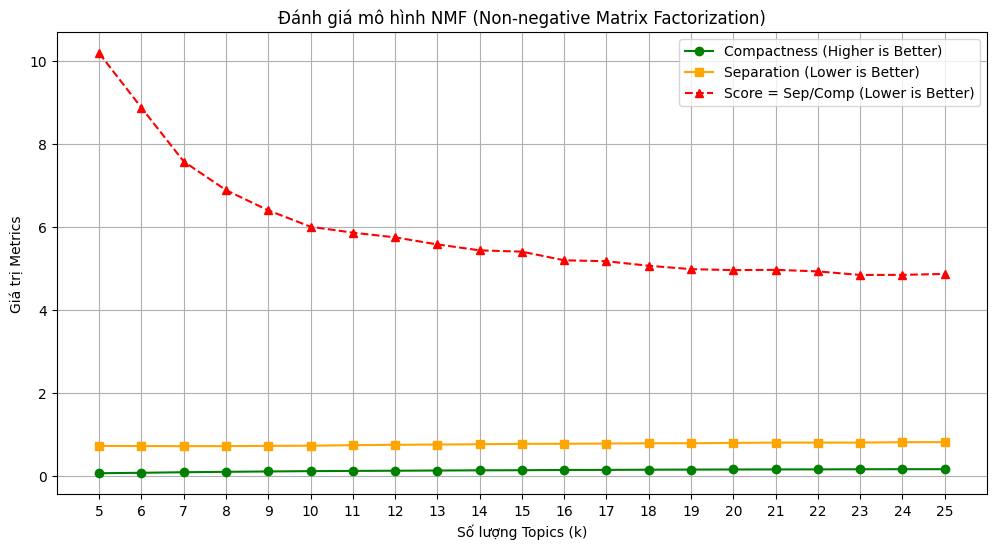

,Topic_ID,Caption
0,0,nhân_viên | công_ty | quản_lý | nghỉ | làm_việc | cũ
1,1,công_việc | kinh_nghiệm | học | làm_việc | thời_gian | tiếng | hàng | tạm
2,2,lương | tr | hạn | thưởng | thử | trừ | tiền
3,3,đóng | công_ty | bảo_hiểm | bệnh | bhxh | y_tế
4,4,phỏng_vấn | hồ_sơ | câu | hr | trả_lời | gọi


In [ ]:
#NMF
nmf_res = evaluate_models('NMF', k_range)
plot_metrics(nmf_res, "NMF (Non-negative Matrix Factorization)")

#Ta thấy số topic tối ưu nhất là 5
BEST_K_NMF = 5
topics_data_nmf, _, _, _ = manager.run_nmf(n_topics=BEST_K_NMF)
df_nmf = pd.DataFrame(topics_data_nmf)
display(df_nmf[['Topic_ID', 'Caption']])

# LDA

--- Đang chạy đánh giá LDA ---
k=5 | Comp=0.0364 | Sep=0.8940 | Score=24.5432
k=6 | Comp=0.0392 | Sep=0.9108 | Score=23.2529
k=7 | Comp=0.0415 | Sep=0.9233 | Score=22.2421
k=8 | Comp=0.0435 | Sep=0.9308 | Score=21.4043
k=9 | Comp=0.0447 | Sep=0.9388 | Score=21.0115
k=10 | Comp=0.0470 | Sep=0.9431 | Score=20.0469
k=11 | Comp=0.0438 | Sep=0.9519 | Score=21.7370
k=12 | Comp=0.0443 | Sep=0.9563 | Score=21.5705
k=13 | Comp=0.0473 | Sep=0.9576 | Score=20.2272
k=14 | Comp=0.0447 | Sep=0.9625 | Score=21.5432
k=15 | Comp=0.0475 | Sep=0.9637 | Score=20.3061
k=16 | Comp=0.0479 | Sep=0.9653 | Score=20.1483
k=17 | Comp=0.0472 | Sep=0.9677 | Score=20.5154
k=18 | Comp=0.0457 | Sep=0.9699 | Score=21.2370
k=19 | Comp=0.0481 | Sep=0.9706 | Score=20.1868
k=20 | Comp=0.0475 | Sep=0.9727 | Score=20.4703
k=21 | Comp=0.0509 | Sep=0.9720 | Score=19.1118
k=22 | Comp=0.0477 | Sep=0.9749 | Score=20.4512
k=23 | Comp=0.0462 | Sep=0.9766 | Score=21.1569
k=24 | Comp=0.0490 | Sep=0.9768 | Score=19.9403
k=25 | Comp=0.

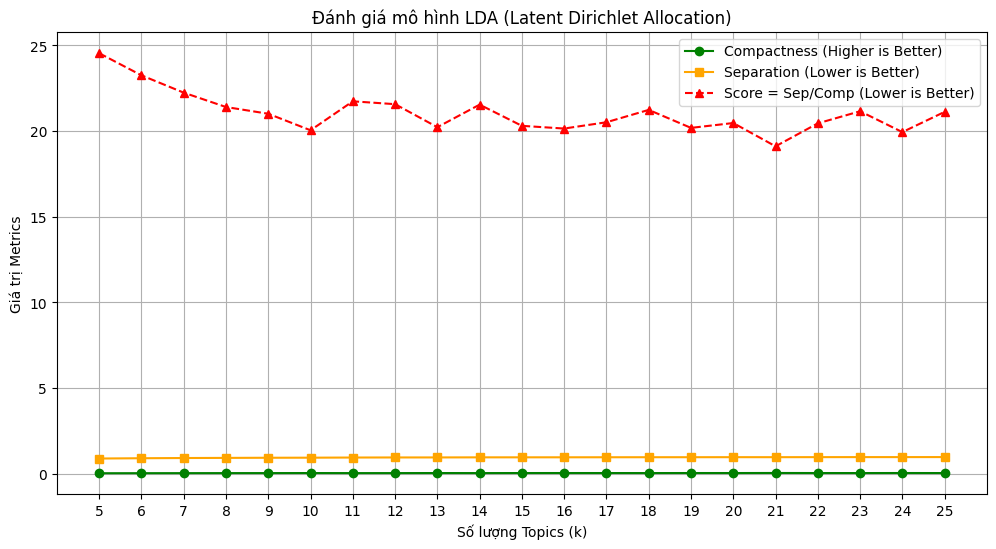

,Topic_ID,Caption
0,0,hồ_sơ | công_việc | có_thể | kinh_nghiệm | mọi_người | chất_lượng | mạng
1,1,lương | nhân_viên | công_ty | làm_việc | nghỉ | thử | kpi
2,2,làm_việc | lương | môi_trường | kinh_nghiệm | thời_gian | nhân_viên | nói_chuyện | độc_hại
3,3,công_ty | phỏng_vấn | công_việc | học | kinh_nghiệm | nhân_sự | thông_báo
4,4,lương | nhân_viên | công_ty | đóng | nghỉ | thất_nghiệp


In [ ]:
#LDA
lda_res = evaluate_models('LDA', range(5, 26)) # Chạy range nhỏ hơn nếu máy yếu
plot_metrics(lda_res, "LDA (Latent Dirichlet Allocation)")

#Ta thấy số topic tối ưu nhất là 5
BEST_K_LDA = 5
topics_data_lda, _, _, _ = manager.run_lda(n_topics=BEST_K_LDA)
df_lda = pd.DataFrame(topics_data_lda)
display(df_lda[['Topic_ID', 'Caption']])